## `What is Twitter Sentiment Analysis?`
Twitter sentiment analysis analyzes the sentiment or emotion of tweets. It uses natural language processing and machine learning algorithms to classify tweets automatically as positiv or  negativ  based on their content. It can be done for individual tweets or a larger dataset related to a particular topic or event..

## `Why is Twitter Sentiment Analysis Important?`
Understanding Customer Feedback: By analyzing the sentiment of customer feedback, companies can identify areas where they need to improve their products or services.
Reputation Management: Sentiment analysis can help companies monitor their brand reputation online and quickly respond to negative comments or reviews.
Political Analysis: Sentiment analysis can help political campaigns understand public opinion and tailor their messaging accordingly.
Crisis Management: In the event of a crisis, sentiment analysis can help organizations monitor social media and news outlets for negative sentiment and respond appropriately.
Marketing Research: Sentiment analysis can help marketers understand consumer behavior and preferences, and develop targeted advertising campaigns.

## `NLP Pipeline`

1.Data Collection

2.Text Wrangling and Preprocessing

3.Vectorization and Feature Engineering

4.Model Building and Initialization

5.Train and Test Model

6.Model Evaluation

7.Deployment

8.Monitoring and Model Updating

## `Importing Necessary Libraries.`

In [1]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud matplotlib

In [3]:
import re, numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt
import contractions

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from autocorrect import Speller
import string, nltk, contractions
from string import punctuation
from unidecode import unidecode
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,  PorterStemmer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.stem import SnowballStemmer

### `Here we load the DataSet.`

In [4]:
sen_df = pd.read_csv(r"C:\Users\AVITA\Desktop\NLP Mentorship\NLP Mentornship project\training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1")
sen_df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
# here we create a list of our column name 
columns_name = ["target","id","date","flag","user","text"]

# here we give a column name that is given in columns_name 

sen_df = pd.read_csv(r"C:\Users\AVITA\Desktop\NLP Mentorship\NLP Mentornship project\training.1600000.processed.noemoticon.csv",names=columns_name, encoding="ISO-8859-1")


## `Dataset Description`

This dataset contains **1,600,000 rows** and **6 columns** with information about tweets and their sentiments. The columns are as follows:

| Column | Description |
|--------|-------------|
| **target** | The polarity of the tweet, indicating whether it is **positive** or **negative**. |
| **ids** | A unique identifier for each tweet. |
| **date** | The date when the tweet was posted. |
| **flag** | Refers to the query type. If no specific query exists, this field shows **NO QUERY**. |
| **user** | The username of the person who tweeted. |
| **text** | The content of the tweet. |



## `Exploratory Data Analysis`


In [6]:
# Here we check the shape of dataset 
sen_df.shape

(1600000, 6)

**NOTE**:- Here we can see that there are **1600000 rows** and **6 columns** are present in our datset.

In [7]:
# Here we check the info 
sen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
# Here we check the null values in our datset 
null_val = sen_df.isnull().sum()
null_val[null_val > 0]

Series([], dtype: int64)

In [9]:
# Here we check the coulumn names
sen_df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [10]:
# Here we check the length of our dataset 
len(sen_df)

1600000

In [11]:
# Here we print the length of a column and rows 
print('Count of columns in the data is:  ', len(sen_df.columns))
print('Count of rows in the data is:  ', len(sen_df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [12]:
# Here we check the value count of "target" column and through this we can easily check the
sen_df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [13]:
# Here we use nunique() to see the unique value in our "target" column
sen_df['target'].nunique()

2


####   Visualization for spread of a data

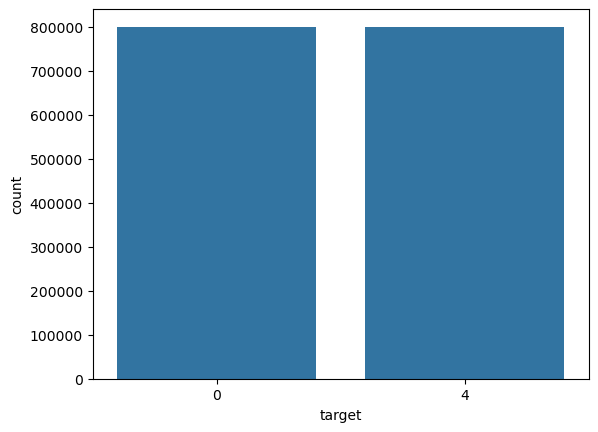

In [14]:
# Here we use the countplot to
sns.countplot(x = 'target', data = sen_df)
plt.show()

With the help of countplot we easily understand the that the `spread of our data is normally distributed.`


    
## Lets work on the NLP Model.

In [15]:
# Here we make a new column in which dependent("target") and independent("text") variable is stored.
main_df = sen_df[['text', 'target']]
main_df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [16]:
# Here we replace the 4 TO 1 for batter understanding of "target" 
main_df['target'] = main_df['target'].replace(4, 1)

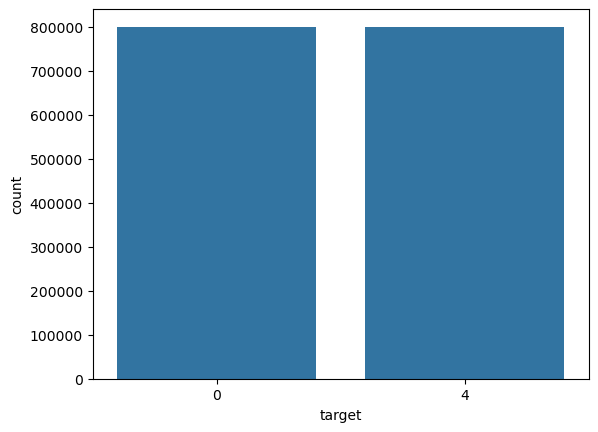

In [17]:
# Here we again use the countplot to check the "target" column
sns.countplot(x = 'target', data = sen_df)
plt.show()

In [18]:
# Here we check he unique values of "target" column
main_df['target'].unique()

array([0, 1], dtype=int64)

In [19]:
# Here we convert "text" column into lower string 
main_df['text'] = main_df['text'].str.lower()
main_df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

##  *NOTES :-*
#### `Stopwords` 
In NLP, stopwords are common words like "a," "the," "is," and "in" that don’t carry significant meaning and are often removed from text data to focus on more important words. Removing stopwords can make text processing faster and improve the efficiency of tasks like sentiment analysis and text classification.

#### `Punctuation` 
Punctuation marks (such as periods, commas, question marks, etc.) are often removed to simplify text data, as they usually don't add meaning to tasks like sentiment analysis or topic modeling. However, in some contexts—like sentiment analysis (e.g., exclamation marks indicating excitement) or conversational analysis—punctuation can carry useful information, so it may be retained.

#### `Tokenize`
Tokenization is a way of separating a piece of text into words or sentences.   
###### A) Word Tokenization
###### B) Sentence Tokenization
###### C) Tweet Tokenization
###### D) Custom Tokenization using Regular Expressionnguage data effectively.

#### `Stemming and Lemmatization` 
Stemming and Lemmatization are NLP techniques used to reduce words to their base or root form, helping to simplify and standardize text data.

1. **Stemming**  
   - Reduces words to their root form by cutting off prefixes or suffixes, often without considering the actual word structure.
   - Example: `"running"`, `"runner"`, and `"ran"` → `"run"`
   - Stemming can produce non-real words, as it’s a more mechanical approach.

2. **Lemmatization**  
   - Reduces words to their *lemma* or dictionary form, considering the word’s meaning and context.
   - Example: `"running"` and `"ran"` → `"run"`
   - Lemmatization is more accurate than stemming and produces real words, but it’s computationally more intensive.

In [20]:
# 1. Remove spaces and newlines
def remove_spaces(data):
    clean_text = data.replace('\\n', ' ').replace('\t', ' ').replace('\\', ' ')
    return clean_text

# 2. Contraction Mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3. Handling Accented Characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning stopwords from text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

# 5. Cleaning and removing punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# 6. Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# 7. Cleaning URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)

# 8. Autocorrection (optional, if required)
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 9. Clean and Tokenize the text (after stopwords, punctuation removal)
def clean_data(data):
    tokens = word_tokenize(data)  # list of words
    clean_text = [word.lower() for word in tokens if word not in string.punctuation and len(word) >= 2 and word.isalpha()]
    return clean_text

# 10. Apply stemming
def stemming_on_text(data):
    stemmer = SnowballStemmer('english')  # Specify the language
    text = [stemmer.stem(word) for word in data]
    return " ".join(text)

# 11. Apply lemmatization
def lemmatizer_on_text(data):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in data]
    return " ".join(text)


In [21]:
# Step 1: Remove spaces, newlines
main_df['text'] = main_df['text'].apply(lambda text: remove_spaces(text))  # Removing extra spaces/newlines
print("Removed spaces and newlines is completed")

# Step 2: Expand contractions
main_df['text'] = main_df['text'].apply(lambda text: expand_text(text))  # Expanding contractions
print("Expanded contractions is completed")

# Step 3: Handle accented characters
main_df['text'] = main_df['text'].apply(lambda text: handling_accented(text))  # Handling accented characters
print("Handled accented characters is completed")

# Step 4: Removing stopwords
main_df['text'] = main_df['text'].apply(lambda text: cleaning_stopwords(text))  # Removing stopwords
print("Removed stopwords is completed")

# Step 5: Removing punctuation
main_df['text'] = main_df['text'].apply(lambda x: cleaning_punctuations(x))  # Removing punctuation
print("Removed punctuation is completed")

# Step 7: Removing URLs
main_df['text'] = main_df['text'].apply(lambda x: cleaning_URLs(x))  # Removing URLs
print("Removed URLs is completed")

# Step 8: Removing numbers
main_df['text'] = main_df['text'].apply(lambda x: cleaning_numbers(x))  # Removing numbers
print("Removed numbers is completed")

# Step 9: Tokenize the text
tokenizer = RegexpTokenizer(r'\w+')  # Use regex to tokenize text
main_df['text'] = main_df['text'].apply(tokenizer.tokenize)
print("Tokenized text is completed")

# Step 10: Apply stemming
main_df['text'] = main_df['text'].apply(lambda x: stemming_on_text(x))  # Applying stemming
print("Applied stemming_on_text is completed")



Removed spaces and newlines is completed
Expanded contractions is completed
Handled accented characters is completed
Removed stopwords is completed
Removed punctuation is completed
Removed URLs is completed
Removed numbers is completed
Tokenized text is completed
Applied stemming_on_text is completed


In [22]:
# Here we check the "text" column
main_df['text']

0          switchfoot httptwitpiccomyzl a shoulda got dav...
1          upset cannot updat facebook text it might cri ...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4          nationwideclass no behav all mad here cannot s...
                                 ...                        
1599995                        woke up school best feel ever
1599996    thewdbcom cool hear old walt interview a httpb...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: text, Length: 1600000, dtype: object

## `Word Cloud`
A **Word Cloud** is a visual representation of text data where the size of each word indicates its frequency or importance in a given dataset. Words that appear more frequently in the text are displayed in a larger font size, while less frequent words appear smaller. Word clouds are often used to quickly convey the most prominent terms in a collection of text, making them a popular tool for summarizing large amounts of unstructured text data, like reviews, tweets, or articles. The design is often aesthetically appealing, with words arranged in various orientations and colors.

## Here we make a `Word Cloud for Negative Tweet`.

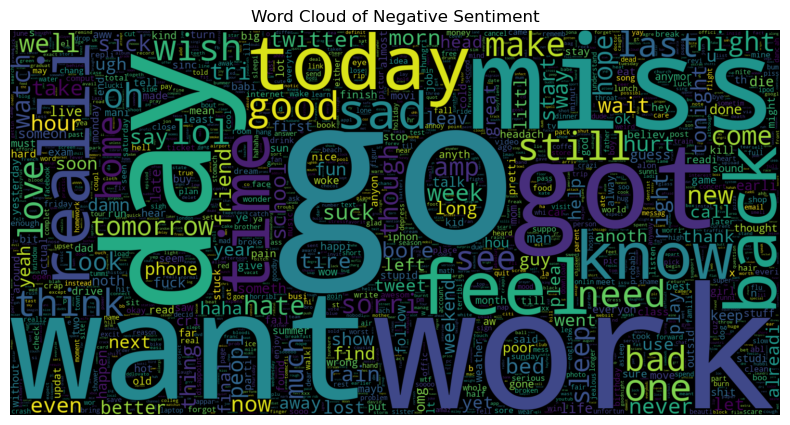

In [23]:
data_neg = main_df[main_df['target'] == 0]['text']  # Filter by target == 0

# Generate the word cloud
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=50000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))

# Display the word cloud
plt.title('Word Cloud of Negative Sentiment')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes for better visualization
plt.show()

## Here we make a `Word Cloud for Positive tweets`.

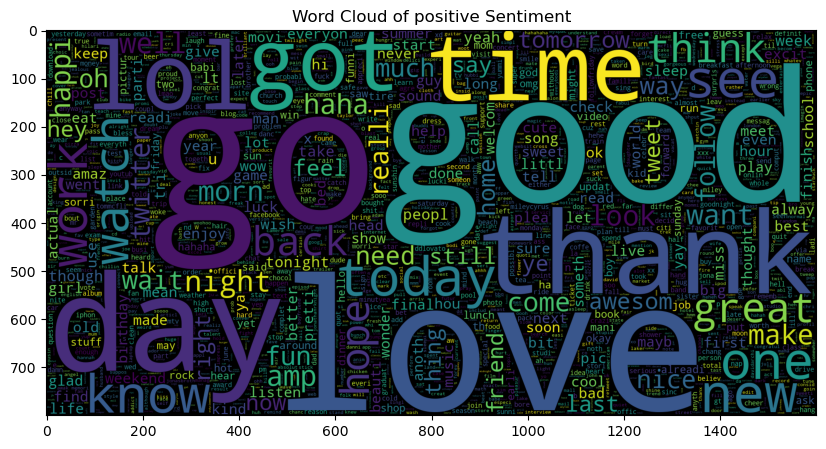

In [24]:
data_pos = main_df['text'][800000:]
wc = WordCloud(max_words = 50000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (10,5))
plt.title('Word Cloud of positive Sentiment')
plt.imshow(wc)

## `Working on model to get insights.`

In [25]:
# Here we make two new varable df_x (dependent) and df_y (independent) 
df_x = main_df['text']
df_y = main_df['target']

In [26]:
# Here we use the train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 286348, stratify=df_y)

### `TF-IDF Vectorizer`
**TF-IDF Vectorizer** is an NLP tool that assigns importance to words in a document based on how often they appear in that document (Term Frequency) and how rare they are across all documents (Inverse Document Frequency). 
- **High TF-IDF** score means a word is important in that document but uncommon across the corpus.
- This helps in identifying keywords that uniquely describe a document, making it useful for tasks like text classification and information retrieval.

In [27]:
# Here we use the Tf-idf Vectorizer 
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, stop_words='english')
x_train_tfidf = vectoriser.fit_transform(x_train)
num_features = len(vectoriser.get_feature_names_out())
print(f'No. of feature words: {num_features}')

No. of feature words: 50000


In [28]:
x_test_tfidf = vectoriser.transform(x_test)

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">`Model-1 :`LogisticRegression`</span>

In [29]:
model = LogisticRegression()
model = model.fit(x_train_tfidf, y_train)

In [30]:
# Here we check the accuracy
y_train_pred = model.predict(x_train_tfidf)
print("Value of accuracy_score : \n",  accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : \n", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report: \n", classification_report(y_train, y_train_pred))

Value of accuracy_score : 
 0.7862975
Value of confusion_matrix : 
 [[456485 143515]
 [112928 487072]]
Value of classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78    600000
           1       0.77      0.81      0.79    600000

    accuracy                           0.79   1200000
   macro avg       0.79      0.79      0.79   1200000
weighted avg       0.79      0.79      0.79   1200000



**NOTE** :- The Logistic Regression accuracy_score is : 0.7862975

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">`Model-2 :`Bernoulli Naive Bayes`</span>

In [31]:
print("\nTraining Bernoulli Naive Bayes...")

bnb_model = BernoulliNB()
bnb_model.fit(x_train_tfidf, y_train)

# Predict on the training set
y_train_pred_bnb = bnb_model.predict(x_train_tfidf)

# Print evaluation metrics for Bernoulli Naive Bayes
print("Bernoulli Naive Bayes Accuracy Score: \n", accuracy_score(y_train, y_train_pred_bnb))
print("Bernoulli Naive Bayes Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred_bnb))
print("Bernoulli Naive Bayes Classification Report: \n", classification_report(y_train, y_train_pred_bnb))



Training Bernoulli Naive Bayes...
Bernoulli Naive Bayes Accuracy Score: 
 0.7711816666666667
Bernoulli Naive Bayes Confusion Matrix: 
 [[449640 150360]
 [124222 475778]]
Bernoulli Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    600000
           1       0.76      0.79      0.78    600000

    accuracy                           0.77   1200000
   macro avg       0.77      0.77      0.77   1200000
weighted avg       0.77      0.77      0.77   1200000



**NOTE** :- The Bernoulli Naive Bayes Accuracy Score is : 0.7711816666666667

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">`Model-3 :`AdaBoostClassifier</span>

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:

print("\nTraining AdaBoost Classifier...")

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier()

# Fit the model on the training data
ada_model.fit(x_train_tfidf, y_train)

# Predict on the training set
y_train_pred_ada = ada_model.predict(x_train_tfidf)

# Print evaluation metrics for AdaBoost
print("AdaBoost Classifier Accuracy Score: \n", accuracy_score(y_train, y_train_pred_ada))
print("AdaBoost Classifier Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred_ada))
print("AdaBoost Classifier Classification Report: \n", classification_report(y_train, y_train_pred_ada))



Training AdaBoost Classifier...
AdaBoost Classifier Accuracy Score: 
 0.6671891666666667
AdaBoost Classifier Confusion Matrix: 
 [[268121 331879]
 [ 67494 532506]]
AdaBoost Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.45      0.57    600000
           1       0.62      0.89      0.73    600000

    accuracy                           0.67   1200000
   macro avg       0.71      0.67      0.65   1200000
weighted avg       0.71      0.67      0.65   1200000



**NOTE** :- The AdaBoost Classifier Accuracy Score is :0.6671891666666667

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">`Model-4 :`SVM (Support Vector Machine</span>

In [34]:
from sklearn.svm import LinearSVC
print("\nTraining Support Vector Machine (SVM)...")

# Initialize the SVM model
svm_model = LinearSVC()

# Fit the model on the training data
svm_model.fit(x_train_tfidf, y_train)

# Predict on the training set
y_train_pred_svm = svm_model.predict(x_train_tfidf)

# Print evaluation metrics for SVM
print("SVM Accuracy Score: \n", accuracy_score(y_train, y_train_pred_svm))
print("SVM Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred_svm))
print("SVM Classification Report: \n", classification_report(y_train, y_train_pred_svm))



Training Support Vector Machine (SVM)...
SVM Accuracy Score: 
 0.7911216666666666
SVM Confusion Matrix: 
 [[458235 141765]
 [108889 491111]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79    600000
           1       0.78      0.82      0.80    600000

    accuracy                           0.79   1200000
   macro avg       0.79      0.79      0.79   1200000
weighted avg       0.79      0.79      0.79   1200000



**NOTE** :- The Support Vector Machine (SVM) Accuracy Score is : 0.7911208333333334

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">`Model-5 :`Random Forest Classifier</span>

In [35]:
from sklearn.ensemble import RandomForestClassifier
print("\nTraining Random Forest...")

# Initialize the Random Forest model
rf_model = RandomForestClassifier(max_depth=10)


# Train the model on the training set
rf_model.fit(x_train_tfidf, y_train)

# Predict on the training set
y_train_pred_rf = rf_model.predict(x_train_tfidf)

# Print evaluation metrics for Random Forest
print("Random Forest Accuracy Score: \n", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred_rf))
print("Random Forest Classification Report: \n", classification_report(y_train, y_train_pred_rf))


Training Random Forest...
Random Forest Accuracy Score: 
 0.7168741666666667
Random Forest Confusion Matrix: 
 [[361579 238421]
 [101330 498670]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.60      0.68    600000
           1       0.68      0.83      0.75    600000

    accuracy                           0.72   1200000
   macro avg       0.73      0.72      0.71   1200000
weighted avg       0.73      0.72      0.71   1200000



**NOTE** :- The RandomForestClassifier Accuracy Score is : 0.7202091666666667

## `Conclusion`

Based on the accuracy scores of all the models, here’s the updated conclusion:  

1. **Best Performance with SVM**: The Support Vector Machine (SVM) model remains the best-performing model with the highest accuracy of **0.7911**. It is the most reliable choice for this dataset.  

2. **Logistic Regression as a Strong Contender**: Logistic Regression, with an accuracy of **0.7863**, performs closely to SVM, indicating its robustness and potential suitability, particularly when interpretability is a priority.  

3. **Moderate Performance by Bernoulli Naive Bayes**: With an accuracy of **0.7712**, Bernoulli Naive Bayes provides a moderate performance. It could be a good choice for simpler implementations or datasets with binary features.  

4. **Random Forest Moderate to Low Accuracy**: The Random Forest Classifier achieved an accuracy of **0.7202**, which is moderate but lower than SVM, Logistic Regression, and Bernoulli Naive Bayes. It may not be the best choice but could be revisited with further hyperparameter tuning.  

5. **Least Performance by AdaBoost**: AdaBoost scored the lowest accuracy of **0.6672**, suggesting it is less suited for this problem or dataset without significant optimization or changes in feature engineering.  

### Final Recmmendation:  
SVM is the most promising model for this dataset, followed by Logistic Regression. Bernoulli Naive Bayes could be considered for specific scenarios, but Random Forest and AdaBoost appear less effective in their current configurations. Further model fine-tuning and data preprocessing might improve the performance of the lower-scoring models.rformance.